In [2]:
import matplotlib.pyplot as plt
import os
import sys
from sklearn import datasets

# Set the working directory
PROJ_ROOT = os.path.join( os.pardir )
sys.path.append( PROJ_ROOT )
iris = datasets.load_iris()





Determining the optimal number of clusters (K) in K-means clustering when it's unknown often involves a two-step process:

1. Evaluating a range of K values:

    Choose a range of K values to experiment with, typically starting from 1 (all data points in one cluster) and going up to a reasonable number based on your understanding of the data.
    For each K value, run the K-means algorithm and record a relevant evaluation metric. A common metric is the Within-Cluster Sum of Squares (WCSS), which represents the total squared distance of each data point to its respective cluster centroid. Lower WCSS generally indicates better clustering.

2. Identifying the "elbow point":

    Plot the evaluation metric (e.g., WCSS) against the number of clusters (K).
    Look for an "elbow" in the plot, where the rate of decrease in the metric starts to slow down significantly. This point often indicates the optimal K, as adding more clusters beyond this point may not yield significant improvements in clustering quality while increasing the model's complexity.

Applying the strategy to Iris data:

Following this strategy with the Iris dataset, which has 3 known flower species, we can:

    Run K-means for K values ranging from 1 to 10 (or higher if desired).
    Calculate WCSS for each K.
    Plot WCSS vs. K.

Here, the elbow point is likely to be around K=3, which aligns with the actual number of flower species in the dataset. However, it's important to note that the elbow point might not always be perfectly clear, and domain knowledge about the data can be valuable when making the final decision.

Running the K-means algorithm multiple times with different initial centroids for each K value can help mitigate the impact of initialization on the results and ensure a more robust evaluation.

In [20]:
# explore the data
from src.features.build_features import explore_data
import pandas as pd

explore_data(pd.DataFrame(iris.data))


Shape: (150, 4)
Head:      0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
Tail:        0    1    2    3
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8
Description:                 0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.057333    3.758000    1.199333
std      0.828066    0.435866    1.765298    0.762238
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000
Data Types: 0    float64
1    float64
2    float64
3    float64
dtype: object


<Axes: >

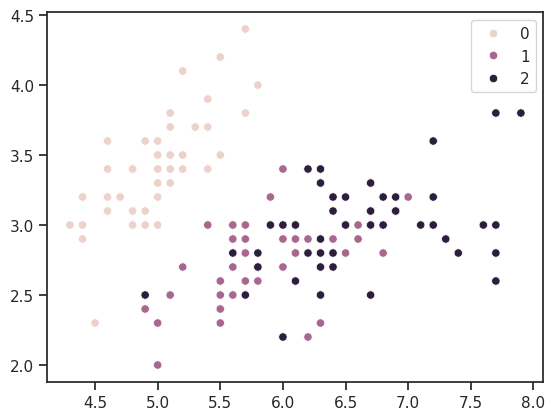

In [23]:
# plot the data
import seaborn as sns
sns.set_theme(style="ticks")
sns.scatterplot(x=iris.data[:,0], y=iris.data[:,1], hue=iris.target)


In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
# Define a range of K values to test

# Create the KMeans model with the optimal K
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model again
kmeans.fit(iris.data)

# Print cluster labels
print("Cluster labels:", kmeans.labels_)

# compare the clusters to the actual labels in a table

# Create a confusion matrix
confusion = confusion_matrix(iris.target, kmeans.labels_)
print(confusion)
# calculate error rate
error_rate = 1 - np.sum(confusion.max(axis=1)) / np.sum(confusion)
print("Error rate:", error_rate)


Cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]
Error rate: 0.11333333333333329


In [42]:
kmeans = KMeans(n_clusters=3, random_state=40)

# Fit the model again
kmeans.fit(iris.data)

# Print cluster labels
print("Cluster labels:", kmeans.labels_)

# compare the clusters to the actual labels in a table

# Create a confusion matrix
confusion = confusion_matrix(iris.target, kmeans.labels_)
print(confusion)
error_rate = 1 - np.sum(confusion.max(axis=1)) / np.sum(confusion)
print("Error rate:", error_rate)

Cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[ 0 50  0]
 [47  0  3]
 [14  0 36]]
Error rate: 0.11333333333333329


[0.92461872 0.05306648 0.01710261 0.00521218]
(150, 1)


<Axes: >

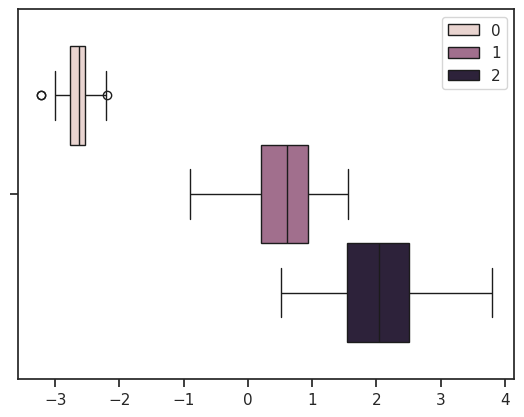

In [70]:
# PCA to reduce the dimensionality of the data
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(iris.data)
## determine the number of components to keep by looking at the coefficients
print(pca.explained_variance_ratio_)
# 1 pca component is enough to explain 92% of the variance
pca = PCA(n_components=1)
pca.fit(iris.data)
iris_pca = pca.transform(iris.data)
print(iris_pca.shape)
# plot the data
sns.boxplot(x=iris_pca[:,0],  hue=iris.target)

In [71]:
# Create the KMeans model with the pca data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(iris_pca)
# Print cluster labels
print("Cluster labels:", kmeans.labels_)

# compare the clusters to the actual labels in a table

# Create a confusion matrix
confusion = confusion_matrix(iris.target, kmeans.labels_)
print(confusion)
error_rate = 1 - np.sum(confusion.max(axis=1)) / np.sum(confusion)
print("Error rate:", error_rate)

Cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 0 0
 0 2]
[[ 0 50  0]
 [ 1  0 49]
 [38  0 12]]
Error rate: 0.08666666666666667


[0.72962445 0.22850762 0.03668922 0.00517871]


<Axes: >

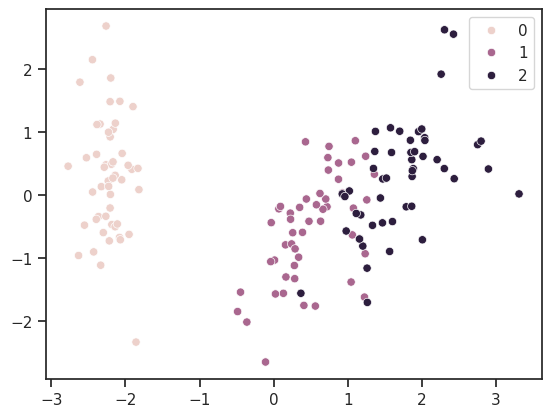

In [75]:
# PCA with scaled data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(iris.data)
iris_scaled = scaler.transform(iris.data)
pca = PCA()
pca.fit(iris_scaled)
print(pca.explained_variance_ratio_)
# plot the data
# sns.boxplot(x=iris_pca_s[:,0],  hue=iris.target)
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca_s = pca.transform(iris_scaled)
# plot the data
sns.scatterplot(x=iris_pca_s[:,0],y=iris_pca_s[:,1],  hue=iris.target)


In [78]:
# Create the KMeans model with the pca data
kmeans_s = KMeans(n_clusters=3, random_state=42)
kmeans_s.fit(iris_pca_s)
# Print cluster labels
print("Cluster labels:", kmeans_s.labels_)

# compare the clusters to the actual labels in a table

# Create a confusion matrix
confusion_s = confusion_matrix(iris.target, kmeans_s.labels_)
print(confusion_s)
error_rate_s = 1 - np.sum(confusion_s.max(axis=1)) / np.sum(confusion_s)
print("Error rate:", error_rate_s)

Cluster labels: [1 2 2 2 1 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 2 2 1
 1 2 1 1 2 2 1 1 2 1 2 1 1 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[[ 0 33 17]
 [46  0  4]
 [50  0  0]]
Error rate: 0.14
